In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
pip install bnlp_toolkit

  Obtaining dependency information for bnlp_toolkit from https://files.pythonhosted.org/packages/af/99/5d688fc2e5f6494d6c0a4e6bcdc8192266869caeef3b41dbc3dc8358616d/bnlp_toolkit-4.0.0-py3-none-any.whl.metadata
  Obtaining dependency information for ftfy from https://files.pythonhosted.org/packages/91/f8/dfa32d06cfcbdb76bc46e0f5d69c537de33f4cedb1a15cd4746ab45a6a26/ftfy-6.1.3-py3-none-any.whl.metadata
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 175.4/175.4 kB 3.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... - done
  Obtaining dependency information for wcwidth<0.3.0,>=0.2.12 from https://files.pythonhosted.org/packages/31/b1/a59de0ad3aabb17523a39804f4c6df3ae87ead053a4e25362ae03d73d03a/wcwidth-0.2.12-py2.py3-none-any.whl.metadata
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 993.5/993.5 kB 26.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.4/53.4 kB 5.9 MB/s eta 0:00:00
  Created wheel for emoji: filename=emoji-1.7.0-py3-none-any.whl size=171033 sha256=250abae8dc

In [3]:
train_df = pd.read_excel("/kaggle/input/bemoc-dataset/cleaned_BEmoC7k.xlsx")

In [4]:
train_df.head()

,TEXT,classes
0,নাইমা কি করবেন আমরা জানি,sadness
1,ভাই সব আপনাদের খুব ভাল লাগছে,joy
2,গাঞ্জা খাইয়া নিউজ শেয়ার করছে দিগন্ত বয়কটে ...,anger
3,অনেক ধন্যবাদ স্যার যশোরে ইত্যাদি অনুষ্ঠান করার...,joy
4,বর্তমানে মুসলমান মারে যে জন সে জন হয়েছে ঈশ্বর,disgust


In [5]:
train_df.dropna(inplace=True)

In [6]:
longest_string = max(train_df["TEXT"], key=len)
print(len(longest_string))

1093


In [7]:
train_df["classes"].value_counts()

classes
joy         1524
disgust     1356
sadness     1327
anger       1052
fear         962
surprise     779
Name: count, dtype: int64

In [8]:
selected_stopwords = ['নিজের', 'তারৈ', 'আমি', 'ঐ', 'আপনি', 'হত', 'ও', 'ওঁদের', 'শুধু', 
                      'তাহার', 'ওদের', 'নিজেই', 'আমার', 'আপনার', 'তাঁর', 'তাকে', 'যাকে',
                      'এঁরা', 'তাদের','কোনও', 'তাও', 'অবধি', 'এটি','হৈলে', 'তারা','সে', 
                      'সহিত', 'দিয়ে', 'কিছুই', 'তবে','ই', 'সহ', 'যাঁরা', 'হলো', 'যাঁর', 
                      'তোমার','তবু', 'তিনিও','হয়েছিল', 'অথবা', 'দ্বারা', 'গেল', 'জে', 
                      'তাই', 'কি', 'সেটা', 'একে', 'এত', 'টি', 'হন', 'প্রায়', 'আর','হয়েই',
                      'নিজে', 'তার', 'যেমন','খুব', 'গুলি', 'অর্থাত', 'তো', 'কোন', 'হয়তো',
                      'বরং', 'কেউই', 'প্রভৃতি','তাঁকে', 'এখন', 'ওর', 'ছিল', 'ওকে', 'ওঁরা',
                      'এটাই', 'তুমি', 'তাহলে','যে', 'এমনকী', 'বহু', 'তেমন', 'আই', 'তাহাতে',
                      'যিনি', 'এঁদের','হইতে', 'স্বয়ং', 'এরা', 'ইত্যাদি', 'অন্তত', 'সেটি',
                      'ওরা', 'তাতে', 'এবং', 'এতে', 'ইহা', 'এস', 'গোটা', 'তথা','যদিও', 
                      'হতেই', 'হয়েছেন', 'বিভিন্ন', 'এ', 'এদের', 'উনি', 'হয়', 'যার', 
                      'এই', 'বা', 'বেশ', 'পারে', 'যতটা', 'অনেকেই', 'অথচ', 'অতএব', 
                      'চায়', 'কী', 'তাহা', 'ওঁর', 'তিনঐ', 'ফলে',
                      'ওই', 'এটা']

In [9]:
stopwords_length = len(selected_stopwords)

print("Number of stopwords:", stopwords_length)

Number of stopwords: 121


In [10]:
from bnlp import NLTKTokenizer

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [11]:
# Initialize tokenizer
bnltk = NLTKTokenizer()

# Function to remove stopwords
def remove_stopwords(text):
    words = bnltk.word_tokenize(text)
    filtered_words = [word for word in words if word not in selected_stopwords]
    return ' '.join(filtered_words)

train_df['TEXT'] = train_df['TEXT'].apply(remove_stopwords)

In [12]:
train_df

,TEXT,classes
0,নাইমা করবেন আমরা জানি,sadness
1,ভাই সব আপনাদের ভাল লাগছে,joy
2,গাঞ্জা খাইয়া নিউজ শেয়ার করছে দিগন্ত বয়কটে ক...,anger
3,অনেক ধন্যবাদ স্যার যশোরে অনুষ্ঠান করার জন্য,joy
4,বর্তমানে মুসলমান মারে জন জন হয়েছে ঈশ্বর,disgust
...,...,...
6995,হে আল্লাহ আমাদের দেশের প্রতি সহায়ক মহামারী হত...,sadness
6996,ঈদ ছারাও যুদি বাংলাদেশ ঈদের খুশির অামেজ পান ধর...,joy
6997,বছরের সবচেয়ে সেরা ভিডিও দেখেছি আমাদের দেশের সা...,joy
6998,কিরে মিথ্যা কথা কস কেন গতদিন আসিফ আসছি খালি,anger


In [13]:
from sklearn.model_selection import train_test_split

train_df, test_df = train_test_split(train_df, test_size=0.2,stratify=train_df['classes'],random_state=42)


In [14]:
X_train  =  train_df['TEXT'].values.tolist()
y_train = train_df['classes'].tolist()

In [15]:
X_test =  test_df['TEXT'].values.tolist()
y_test = test_df['classes'].tolist()

In [16]:
pip install ktrain

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 25.3/25.3 MB 46.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... - done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 55.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... - done
  Obtaining dependency information for chardet from https://files.pythonhosted.org/packages/38/6f/f5fbc992a329ee4e0f288c1fe0e2ad9485ed064cac731ed2fe47dcc38cbf/chardet-5.2.0-py3-none-any.whl.metadata
  Preparing metadata (setup.py) ... - done
  Preparing metadata (setup.py) ... - done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 468.8/468.8 kB 38.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... - done
  Preparing metadata (setup.py) ... - done
  Preparing metadata (setup.py) ... - done
  Preparing metadata (setup.py) ... - done
  Preparing metadata (setup.py) ... - done
  Preparing metadata (setup.py) ... - done
  Preparing metadata (setup.py) ... - done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.4/199.4 kB 17.3

In [17]:
import ktrain
from ktrain import text
MODEL_NAME = 'csebuetnlp/banglabert'
t = text.Transformer(MODEL_NAME, maxlen=500)

config.json:   0%|          | 0.00/586 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/443M [00:00<?, ?B/s]

In [18]:
trn = t.preprocess_train(X_train, y_train)
val = t.preprocess_test(X_test, y_test)

preprocessing train...
language: bn
train sequence lengths:
	mean : 19
	95percentile : 37
	99percentile : 50


tokenizer_config.json:   0%|          | 0.00/119 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/528k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

Is Multi-Label? False
preprocessing test...
language: bn
test sequence lengths:
	mean : 19
	95percentile : 37
	99percentile : 54


In [19]:
print(trn)

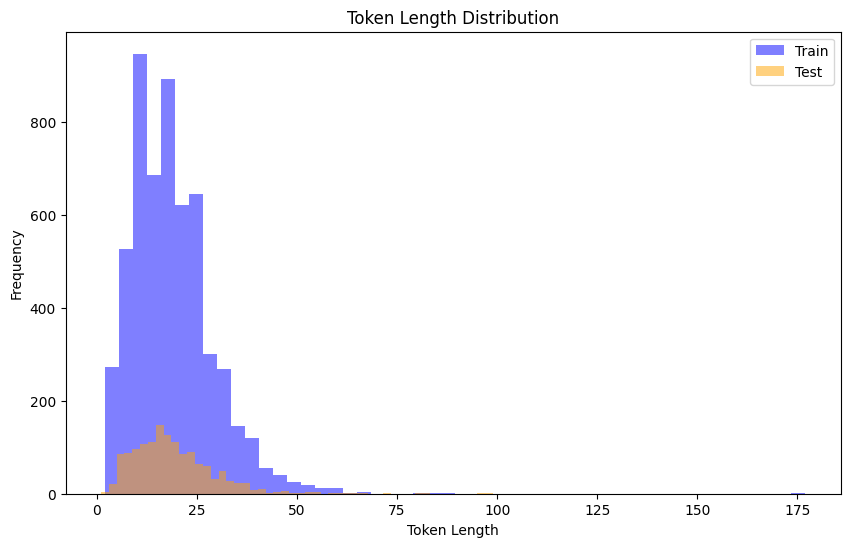

In [20]:
import matplotlib.pyplot as plt

# Calculate token lengths for train and test datasets
train_token_lengths = [len(t.split()) for t in X_train]
test_token_lengths = [len(t.split()) for t in X_test]

# Plot token length distribution
plt.figure(figsize=(10, 6))
plt.hist(train_token_lengths, bins=50, alpha=0.5, color='blue', label='Train')
plt.hist(test_token_lengths, bins=50, alpha=0.5, color='orange', label='Test')
plt.xlabel('Token Length')
plt.ylabel('Frequency')
plt.title('Token Length Distribution')
plt.legend()
plt.show()

In [21]:
model = t.get_classifier()

In [22]:
learner = ktrain.get_learner(model, train_data=trn, val_data=val, batch_size=8)

In [23]:
# Adding early stopping callback from TensorFlow
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, mode='auto')

In [24]:
history = learner.autofit(2e-5, 10, callbacks=[early_stopping])



begin training using triangular learning rate policy with max lr of 2e-05...
Epoch 1/10
700/700 [==============================] - 423s 572ms/step - loss: 1.4314 - accuracy: 0.4364 - val_loss: 1.0169 - val_accuracy: 0.6386
Epoch 2/10
700/700 [==============================] - 396s 566ms/step - loss: 0.9530 - accuracy: 0.6555 - val_loss: 0.9080 - val_accuracy: 0.6743
Epoch 3/10
700/700 [==============================] - 397s 567ms/step - loss: 0.7361 - accuracy: 0.7354 - val_loss: 0.8964 - val_accuracy: 0.6750
Epoch 4/10
700/700 [==============================] - 397s 567ms/step - loss: 0.5667 - accuracy: 0.8025 - val_loss: 0.9592 - val_accuracy: 0.6721
Epoch 5/10
700/700 [==============================] - 396s 566ms/step - loss: 0.4404 - accuracy: 0.8536 - val_loss: 0.9970 - val_accuracy: 0.6850
Epoch 6/10
700/700 [==============================] - 396s 566ms/step - loss: 0.3433 - accuracy: 0.8939 - val_loss: 1.0778 - val_accuracy: 0.6736
Epoch 7/10
700/700 [=========================

In [25]:
# Save the trained model
learner.save_model('/kaggle/output/bemoc.zip')

In [26]:
classes=t.get_classes()

In [27]:
cm = learner.validate(class_names=t.get_classes())

44/44 [==============================] - 10s 166ms/step
              precision    recall  f1-score   support

       anger       0.58      0.58      0.58       211
     disgust       0.53      0.59      0.56       271
        fear       0.73      0.69      0.71       192
         joy       0.84      0.80      0.82       305
     sadness       0.70      0.75      0.73       265
    surprise       0.68      0.56      0.62       156

    accuracy                           0.68      1400
   macro avg       0.68      0.66      0.67      1400
weighted avg       0.68      0.68      0.68      1400



In [28]:
import os
import subprocess
from IPython.display import FileLink, display

def download_file(path, download_file_name):
    os.chdir('/kaggle/working/')
    zip_name = f"/kaggle/working/{download_file_name}.zip"
    command = f"zip {zip_name} {path} -r"
    result = subprocess.run(command, shell=True, capture_output=True, text=True)
    if result.returncode != 0:
        print("Unable to run zip command!")
        print(result.stderr)
        return
    display(FileLink(f'{download_file_name}.zip'))

In [29]:
!zip -r mental.zip /kaggle/output/mental-health-rand

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


	zip warning: name not matched: /kaggle/output/mental-health-rand

zip error: Nothing to do! (try: zip -r mental.zip . -i /kaggle/output/mental-health-rand)


In [30]:
!ls

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


__notebook__.ipynb


In [31]:
from IPython.display import FileLink
FileLink(r'/kaggle/working/mental-health-rand.zip')

/kaggle/working/mental-health-rand.zip

In [32]:
# Get predictions for the test data
preds = learner.predict(val)

# Convert the predicted probabilities to class labels
predicted_labels = np.argmax(preds, axis=1)

# Get the list of class labels
class_labels = t.get_classes()

# Map predicted labels to class labels
predicted_labels = [class_labels[label] for label in predicted_labels]

# Create a DataFrame to store the results
results_df = pd.DataFrame({'Text': X_test, 'True_Label': y_test, 'Predicted_Label': predicted_labels})

# Display the results DataFrame
print(results_df)

# Save the results to a CSV file
results_df.to_csv('classification_results.csv', index=False)

44/44 [==============================] - 7s 155ms/step
                                                   Text True_Label  \
0     বাইরে কেমন যেন একটা খসখস শব্দ হচ্ছে মনে হচ্ছে ...       fear   
1     সোনা বিদেশি মুদ্রা উদ্ধারের মামলায় পুরান ঢাকা...    disgust   
2     সরকারি নিষেধাজ্ঞায় গত মে থেকে টানা দিনের জন্য ...    sadness   
3     সঙ্গে সঙ্গে চিনে ফেললাম আশ্চর্য কিরন দাড়িয়ে আছ...   surprise   
4     এবারের মিস ওয়ার্ল্ড বাংলাদেশ ভিডিওতে যা দেখেছি...    disgust   
...                                                 ...        ...   
1395  যেখানে ভিডিওটা বন্ধ হইসে সিভিলের ওইদিক থেকে তি...       fear   
1396  গাজীপুরের শ্রীপুর উপজেলার নয়নপুর এলাকায় আজ মঙ্...    sadness   
1397  নারীরা কোনো উদ্যোগ নিয়ে মাঠে নামতে চাইলে তাঁরা...        joy   
1398  হঠাৎ লোকটা আমাকে কয়েকটি সাংকেতিক শব্দ বললো বু...       fear   
1399      আবেশ আতঙ্ক এক ধরণের ভয় যা সময়ের সাথে বেড়ে চলে       fear   

     Predicted_Label  
0               fear  
1            disgust  
2            sadness  
3           

In [33]:
results_df["Predicted_Label"].value_counts()

Predicted_Label
disgust     301
joy         293
sadness     284
anger       211
fear        181
surprise    130
Name: count, dtype: int64

In [34]:
results_df["True_Label"].value_counts()

True_Label
joy         305
disgust     271
sadness     265
anger       211
fear        192
surprise    156
Name: count, dtype: int64

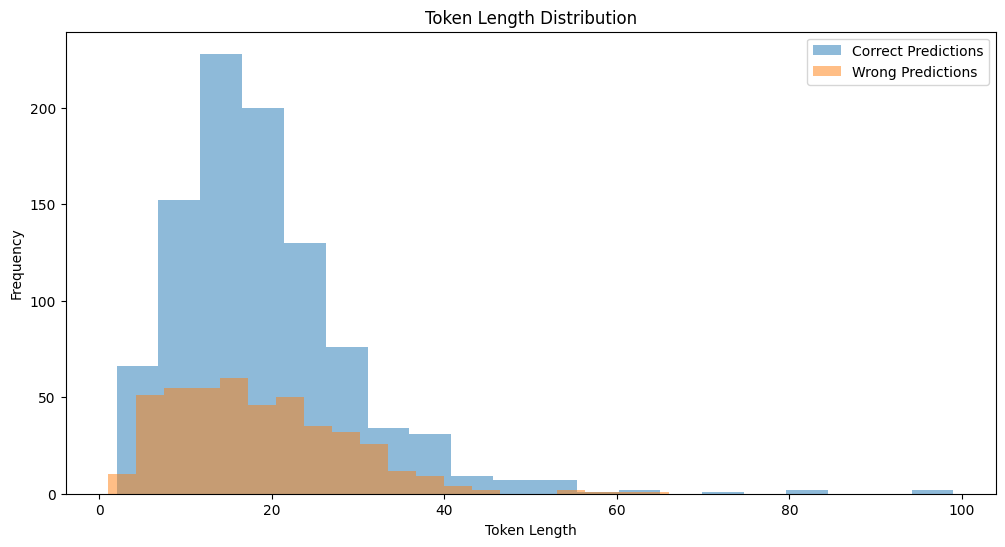

In [35]:
# Calculate token lengths for each description
results_df['Token_Length'] = results_df['Text'].apply(lambda x: len(x.split()))

# Separate data for correct and wrong predictions
correct_preds = results_df[results_df['True_Label'] == results_df['Predicted_Label']]
wrong_preds = results_df[results_df['True_Label'] != results_df['Predicted_Label']]

# Create histograms for token lengths
plt.figure(figsize=(12, 6))
plt.hist(correct_preds['Token_Length'], bins=20, alpha=0.5, label='Correct Predictions')
plt.hist(wrong_preds['Token_Length'], bins=20, alpha=0.5, label='Wrong Predictions')
plt.xlabel('Token Length')
plt.ylabel('Frequency')
plt.title('Token Length Distribution')
plt.legend()
plt.show()

In [36]:
results_df.tail(25)

,Text,True_Label,Predicted_Label,Token_Length
1375,করোনা ভাইরাসের জন্য স্কুল বন্ধ করে দেওয়া হয়েছে...,disgust,fear,23
1376,কাছে মনে হচ্ছে পুরো পৃথিবী যেন থমকে আছে এমন নী...,fear,fear,15
1377,গা শিহরে উঠে ভয়ে দু কানের সামনে পিছনের চুল গুল...,fear,fear,32
1378,মানুষটা কাঁটাতারের দুপাশে থাকা মানুষগুলোর অনুভ...,joy,joy,11
1379,সত্যিই পরিচালকটা অনেক ব্রিলিয়েন্ট জিৎ দার চেহা...,joy,joy,14
1380,পুরাই এপিক হাসতে হাসতে মরে গেলাম মনে হচ্ছে ট্র...,joy,joy,17
1381,কক্সবাজারের কুতুবদিয়া উপজেলায় দুই স্কুলছাত্রকে...,anger,disgust,24
1382,এগুলো সব ধোন নুনু জাত,disgust,anger,5
1383,পুকুর পাড়ে কে যেন মড়ার মত শুয়ে আছে কাছে গিয়ে দ...,fear,fear,16
1384,সব ঠিক আছে তুই মেয়ে ভাল স্ট্রং ক্যারেক্টার শক্...,joy,joy,12


In [37]:
def PlotGraph(history):
  acc = history.history['accuracy']
  val_acc = history.history['val_accuracy']
  loss = history.history['loss']
  val_loss = history.history['val_loss']
  x = range(1, len(acc) + 1)
  plt.figure(figsize=(12, 5))
  plt.subplot(1, 2, 1)
  plt.plot(x, acc, 'g', label='Training acc')
  plt.plot(x, val_acc, 'b', label='Validation acc')
  plt.title('Training and validation accuracy')
  plt.legend()
  plt.subplot(1, 2, 2)
  plt.plot(x, loss, 'g', label='Training loss')
  plt.plot(x, val_loss, 'b', label='Validation loss')
  plt.title('Training and validation loss')
  plt.legend()

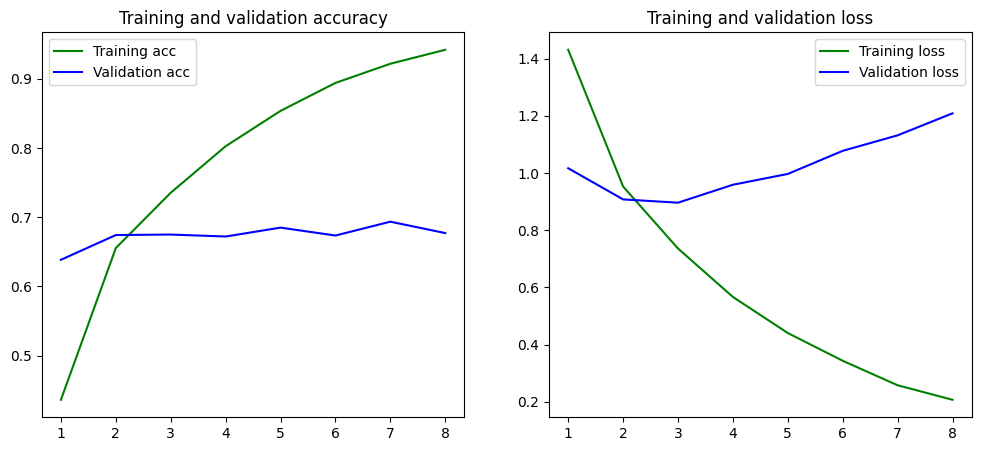

In [38]:
PlotGraph(history)

In [39]:
predictor=ktrain.get_predictor(learner.model, preproc=t)

In [40]:
predictor.predict(" I'm sorry about this post. It's gonna be a whole lot of hand wringing and mental masturbation. But I never seem to be able to process this in a meaningful way - and it makes attending NA and AA meetings a real pain. I don't seem to have the same kind of sickness that everyone else is describing - I'm having trouble relating to anyone at all there. I don't know what it's like for normal functional people, nor do I know what it's like for people who taste 1% beer and come to next month in jail after charging a rhino to a military convoy dressed in wehrmact univorm. Instead of this all-encompassing disease people speak of in groups it's like a slight poly-addiction as parts of the maladaptive patterns I've learned due to ADHD - and the cravings themselves are way lessened due to starting on strattera")

'disgust'

In [41]:
predictor.explain(" I'm sorry about this post. It's gonna be a whole lot of hand wringing and mental masturbation. But I never seem to be able to process this in a meaningful way - and it makes attending NA and AA meetings a real pain. I don't seem to have the same kind of sickness that everyone else is describing - I'm having trouble relating to anyone at all there. I don't know what it's like for normal functional people, nor do I know what it's like for people who taste 1% beer and come to next month in jail after charging a rhino to a military convoy dressed in wehrmact univorm. Instead of this all-encompassing disease people speak of in groups it's like a slight poly-addiction as parts of the maladaptive patterns I've learned due to ADHD - and the cravings themselves are way lessened due to starting on strattera ")

In [42]:
# Make predictions on the entire dataset
y_pred = predictor.predict(X_test)
